# **Actividad nº5 - Aplicando un algoritmo de Clasificación**

_Machine Learning / Aprendizaje de máquina_

### _Regresión lineal_

---
---
<br>

Tal como vimos en clases pasadas, la aplicación de modelos de Machine Learning es parte de un [proceso definido](https://colab.research.google.com/drive/1YUYNpV9HSPY7vlxtE2O9oPE6OL8VBMa5#scrollTo=z2cu2A5rqm2D) que como guía nos ayuda a obtener mejores resultados.

Tu misión en esta actividad es **crear, entrenar y optimizar un modelo Machine Learning utilizando un algoritmo de regresión lineal**. Este modelo debe ser capaz de predecir con el menor rango de error posible el precio de una vivienda.

Utilizando el material del curso como guía y específicamente uno de los [ejemplos vistos](https://colab.research.google.com/drive/1yLzOsCCUetSq_MJGMKCQr39NF0QsiAAg?usp=sharing), deberás aplicar las diversas técnicas y procesos de minería de datos.

Herramientas a utilizar:
- Python (obligatoria)
- Numpy (opcional)
- Pandas (obligatoria)
- Scikit-learn (obligatoria)

Dataset:
- en esta actividad utilizaremos un dataset previamente cargado (a modo de ejemplo) de la librería _scikit-learn_
- contiene diversos datos que podrían influir en el proceso de compra y venta de casas en la ciudad de Boston (EEUU)

<br>

_Sugerencia_: en un proceso regular/normal de machine learning y en particular de un modelo de regresión lineal, una de las labores consiste en definir cuáles características o features serán útiles. Según el modelo lineal simple, se requieren de 2 variables, una independiente y otra dependiente. En este caso, el objetivo entonces es buscar la variable que logre mejores resultados para la predicción del valor de una casa.

In [ ]:
# importa librerías necesarias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# scikit
from sklearn import datasets, linear_model 
from sklearn.model_selection import train_test_split  
from sklearn.linear_model import LinearRegression
from sklearn import metrics


boston_dataset = datasets.load_boston(return_X_y=False)

In [ ]:
# información general sobre el dataset
boston_dataset.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [ ]:
# características del dataset
print(boston_dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [ ]:
# nro de filas y columnas
boston_dataset.data.shape

(506, 13)

In [ ]:
# columnas
boston_dataset.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

### **_Atributos_ / _Características_**

**CRIM**: índice de Crimen per capita por ciudad  
**ZN**: Proporción de tierra residencial dividida en zonas para lotes de más de 25,000 pies cuadrados  (~7620 metros cuadrados)  
**INDUS**: Proporción de acres de negocios no-retail por ciudad  
**CHAS**: Variable ficticia de Charles River (= 1 si el tramo limita con el río; 0 en caso contrario)  
**NOX**: Concentración de óxido nítrico (partes por 10 millones)  
**RM**: Número medio de habitaciones por vivienda.  
**AGE**: Proporción de unidades ocupadas por sus propietarios construidas antes de 1940  
**DIS**: Distancias ponderadas a cinco centros de empleo de Boston  
**RAD**: Índice de accesibilidad a carreteras radiales  
**TAX**: Tasa de impuesto a la propiedad de valor total por 10,000   
**PTRATIO**: Relación alumno-profesor por localidad  
**B**: 1000 (Bk - 0.63) ², donde Bk es la proporción de 'personas de ascendencia afroamericana' por ciudad  
**LSTAT**: Porcentaje de menor estatus de la población.  
**MEDV**: Valor medio de viviendas ocupadas por sus propietarios en miles

In [ ]:
# creamos dataframe
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [ ]:
# agregamos columna no incluida
boston['MEDV'] = boston_dataset.target
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [ ]:
# verificamos si dataset contiene valores nulos
boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

### **Creamos matriz de correlación**

El coeficiente de correlación varía de -1 a 1. Si el valor es cercano a 1, significa que existe una fuerte _**correlación positiva**_ entre las dos variables. Cuando está cerca de -1, las variables tienen una fuerte _**correlación negativa**_.

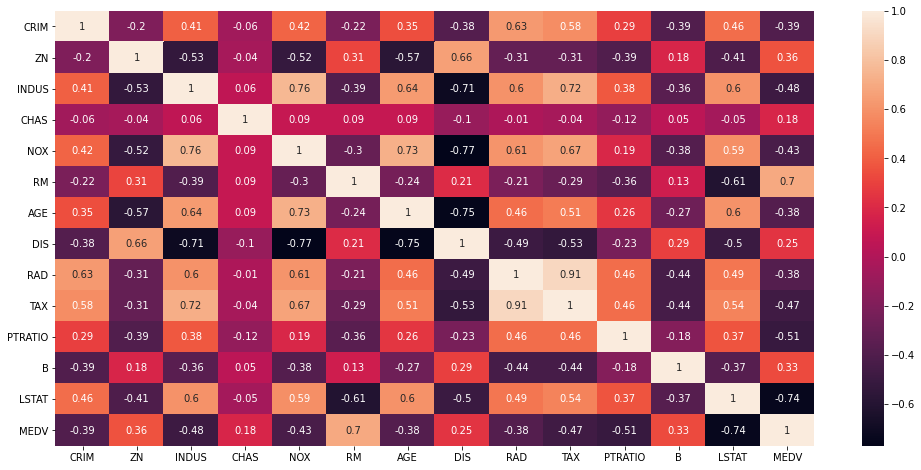

In [ ]:
# creamos matriz de correlación
plt.figure(figsize = (17,8))
correlation_matrix = boston.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

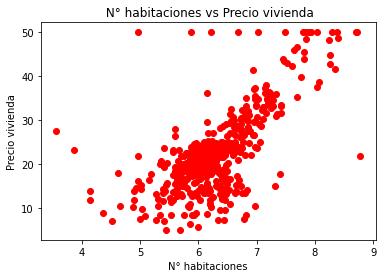

In [ ]:
# graficamos valores/datos de las variables que creemos tienen una fuerte correlación
x = pd.DataFrame(boston['RM'])  # nro medio de habitaciones x vivienda
y = boston['MEDV']  # precio de vivienda en miles

plt.scatter(x, y, color = 'red')
plt.title('N° habitaciones vs Precio vivienda')
plt.xlabel('N° habitaciones')
plt.ylabel('Precio vivienda')
plt.show()

# **Creación y entrenamiento del modelo**

La misión del modelo de machine learning será entonces _dibujar_ la línea perfecta tomando en consideración todos los puntos/datos. Esta linea/modelo será la que prediga los valores ideales con el menor rango de error posible.



In [ ]:
# dividimos el set de datos en subconjuntos de entrenamiento y test (entrenamiento=2/3, test=1/3)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 1/3, random_state=0)

# creamos modelo de regresión lineal
linearRegressor = LinearRegression()

# entrenamos modelo con datos de entrenamiento
linearRegressor.fit(X_train, y_train)

# chequeamos qué tan preciso es nuestro modelo
# referencia: https://es.wikipedia.org/wiki/Coeficiente_de_correlaci%C3%B3n_de_Pearson
linearRegressor.score(X_train, y_train)

0.49876657647204253

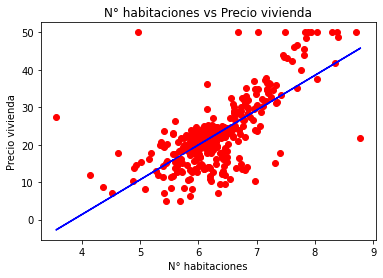

In [ ]:
# graficamos el modelo en conjunto con los datos de entrenamiento
y_pred = linearRegressor.predict(X_train); 
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, linearRegressor.predict(X_train), color = 'blue')
plt.title('N° habitaciones vs Precio vivienda')
plt.xlabel('N° habitaciones')
plt.ylabel('Precio vivienda')
plt.show()

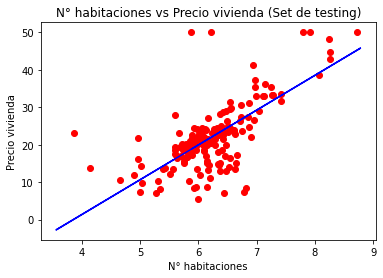

In [ ]:
# graficamos el modelo en conjunto con los datos de testing
# modelo hará una predicción en base a los datos de entrenamiento
plt.scatter(X_test, y_test, color = 'red') # graficamos los puntos/datos de testing
plt.plot(X_train, linearRegressor.predict(X_train), color = 'blue')  # graficamos la línea
plt.title('N° habitaciones vs Precio vivienda (Set de testing)')
plt.xlabel('N° habitaciones')
plt.ylabel('Precio vivienda')
plt.show()

In [ ]:
# comparamos el valor real con el valor predecido
df2 = pd.DataFrame({'Real': y_test, 'Predecido': linearRegressor.predict(X_test).flatten()})
df2

,Real,Predecido
329,22.6,23.015430
371,50.0,21.928272
219,23.0,23.387107
403,8.3,13.872159
78,21.2,22.076943
...,...,...
64,33.0,30.179517
327,22.2,20.692444
322,20.4,20.302183
81,23.9,25.672925


## **A continuación deberás calcular el error del modelo y proponer (puede ser de forma textual) una posible solución o plan de acción para mejorar la precisión del modelo**#